In [1]:
!pip install --upgrade jupyter matplotlib seaborn

In [2]:
# IMPORTING THE LIBRARIES FOR EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline sns.set(color_codes=True)

UsageError: unrecognized arguments: sns.set(color_codes=True)


In [3]:
df = pd.read_csv("C:/Users/Admin/Desktop/youth_smoking_drug_data_10000_rows_expanded.csv")
df.head()

,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1
1,2024,10-14,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3
2,2023,10-14,Both,42.00,56.80,High,6,Yes,2,7,Yes,2,No,5,1
3,2024,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9
4,2023,15-19,Male,47.90,39.62,High,1,No,2,4,Yes,4,No,10,3


In [4]:
df.tail()

,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
9995,2023,15-19,Male,49.17,10.21,Low,7,Yes,4,5,No,7,Yes,2,9
9996,2020,80+,Female,48.00,30.85,Middle,8,Yes,8,8,No,4,Yes,8,9
9997,2021,25-29,Both,47.62,39.54,High,1,No,7,2,Yes,1,No,5,10
9998,2022,40-49,Male,9.37,11.64,Low,7,No,10,1,No,2,Yes,10,4
9999,2023,10-14,Male,43.77,21.95,High,4,Yes,3,4,Yes,1,No,6,3


In [5]:
# CHECKING THE TYPES OF DATA
df.dtypes

Year                      int64
Age_Group                object
Gender                   object
Smoking_Prevalence      float64
Drug_Experimentation    float64
Socioeconomic_Status     object
Peer_Influence            int64
School_Programs          object
Family_Background         int64
Mental_Health             int64
Access_to_Counseling     object
Parental_Supervision      int64
Substance_Education      object
Community_Support         int64
Media_Influence           int64
dtype: object

In [6]:
# DROPPING THE DUPLICATE ROWS
df.shape

(10000, 15)

In [7]:
duplicate_rows_df = df[df.duplicated()]
print(" Number of Duplicate Rows: ",duplicate_rows_df.shape)

 Number of Duplicate Rows:  (0, 15)


In [8]:
df.count()

Year                    10000
Age_Group               10000
Gender                  10000
Smoking_Prevalence      10000
Drug_Experimentation    10000
Socioeconomic_Status    10000
Peer_Influence          10000
School_Programs         10000
Family_Background       10000
Mental_Health           10000
Access_to_Counseling    10000
Parental_Supervision    10000
Substance_Education     10000
Community_Support       10000
Media_Influence         10000
dtype: int64

In [9]:
# DROPPING THE MISSING OR NULL VALUES
print(df.isnull().sum())

Year                    0
Age_Group               0
Gender                  0
Smoking_Prevalence      0
Drug_Experimentation    0
Socioeconomic_Status    0
Peer_Influence          0
School_Programs         0
Family_Background       0
Mental_Health           0
Access_to_Counseling    0
Parental_Supervision    0
Substance_Education     0
Community_Support       0
Media_Influence         0
dtype: int64


<Axes: xlabel='Smoking_Prevalence'>

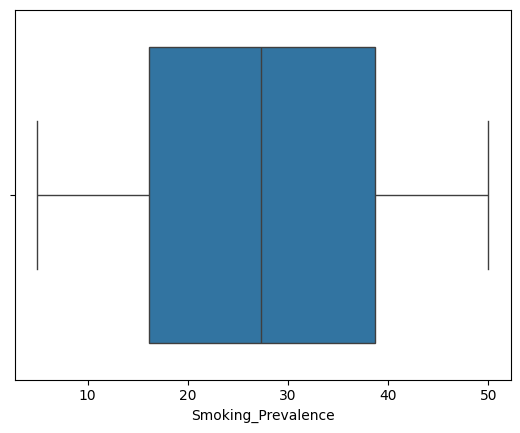

In [10]:
# DETECING THE OUTLIERS
sns.boxplot(x=df['Smoking_Prevalence'])

<Axes: xlabel='Parental_Supervision'>

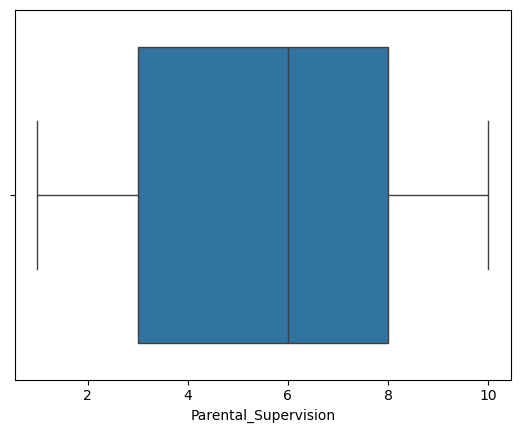

In [11]:
sns.boxplot(x=df['Parental_Supervision'])

Text(0.5, 0, 'Age_Group')

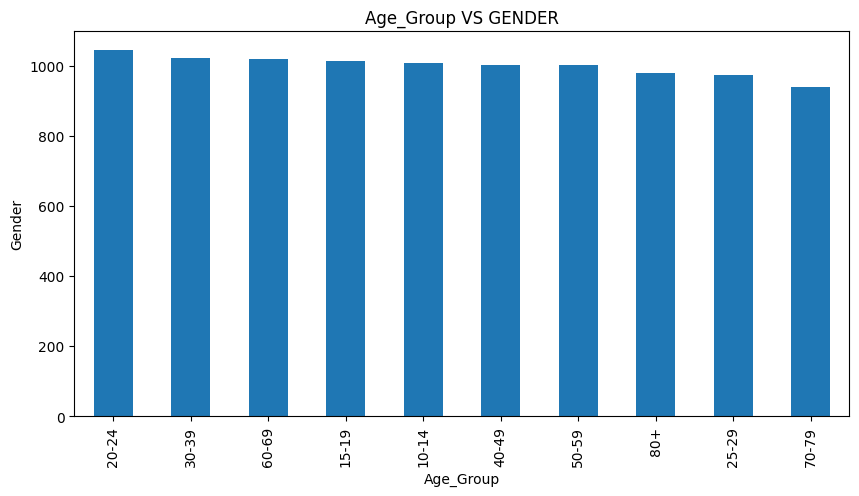

In [12]:
df.Age_Group.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Age_Group VS GENDER")
plt.ylabel('Gender')
plt.xlabel('Age_Group')

Text(0.5, 0, 'Year')

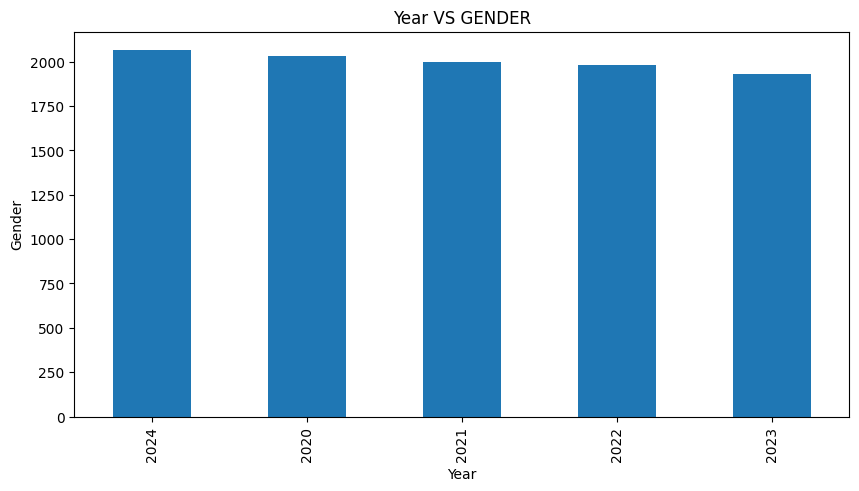

In [13]:
df.Year.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Year VS GENDER")
plt.ylabel('Gender')
plt.xlabel('Year')

In [14]:
df['Age_Group'] = df['Age_Group'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2 if '-' in x else x)

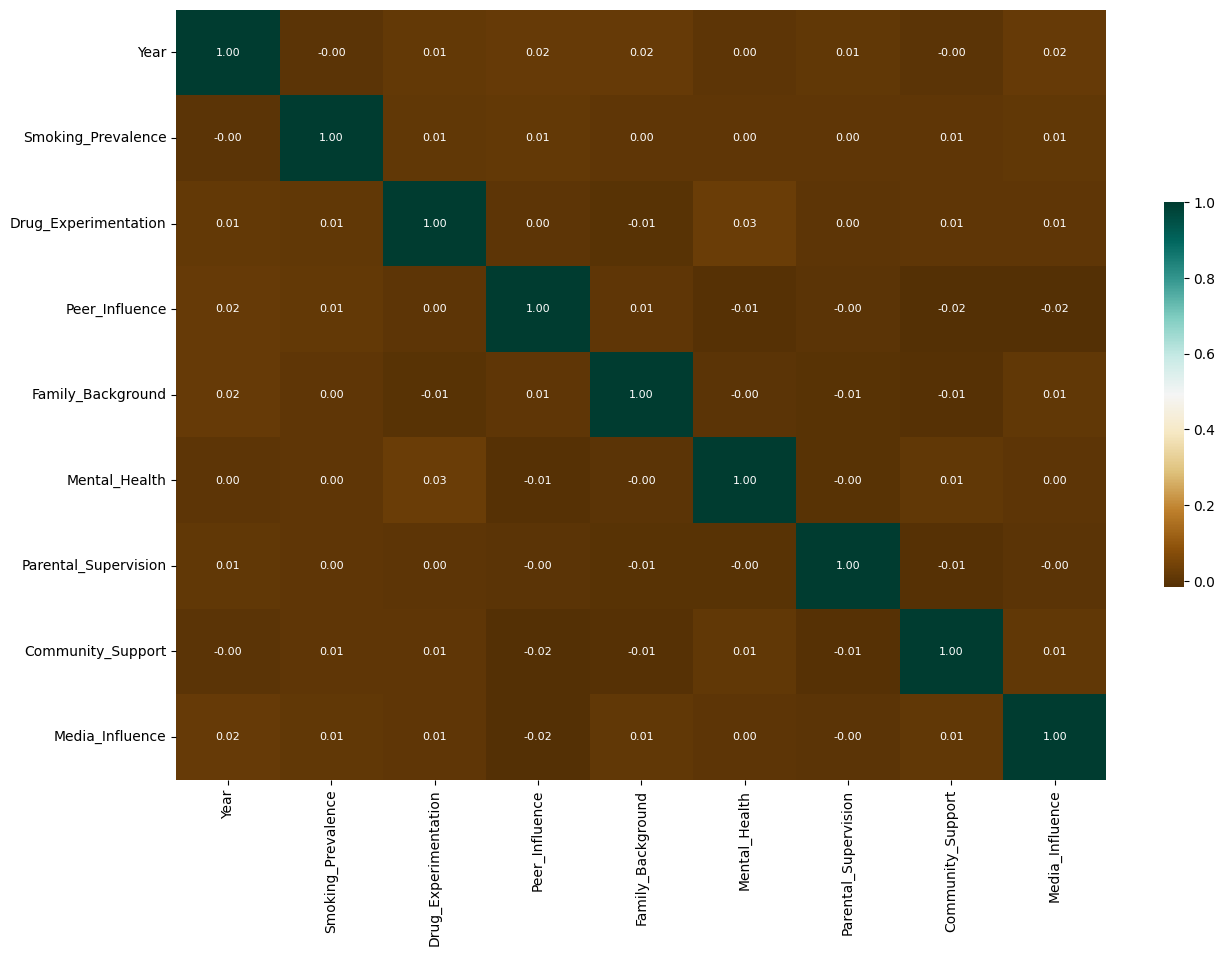

In [15]:
# Select only numeric columns, as correlation requires numeric data
df_numeric = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix for the numeric columns
c = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10), dpi=100)  # Adjust figure size and resolution for readability
sns.heatmap(c, cmap="BrBG", annot=True, annot_kws={"size": 8}, fmt=".2f", cbar_kws={"shrink": 0.5})
plt.show()


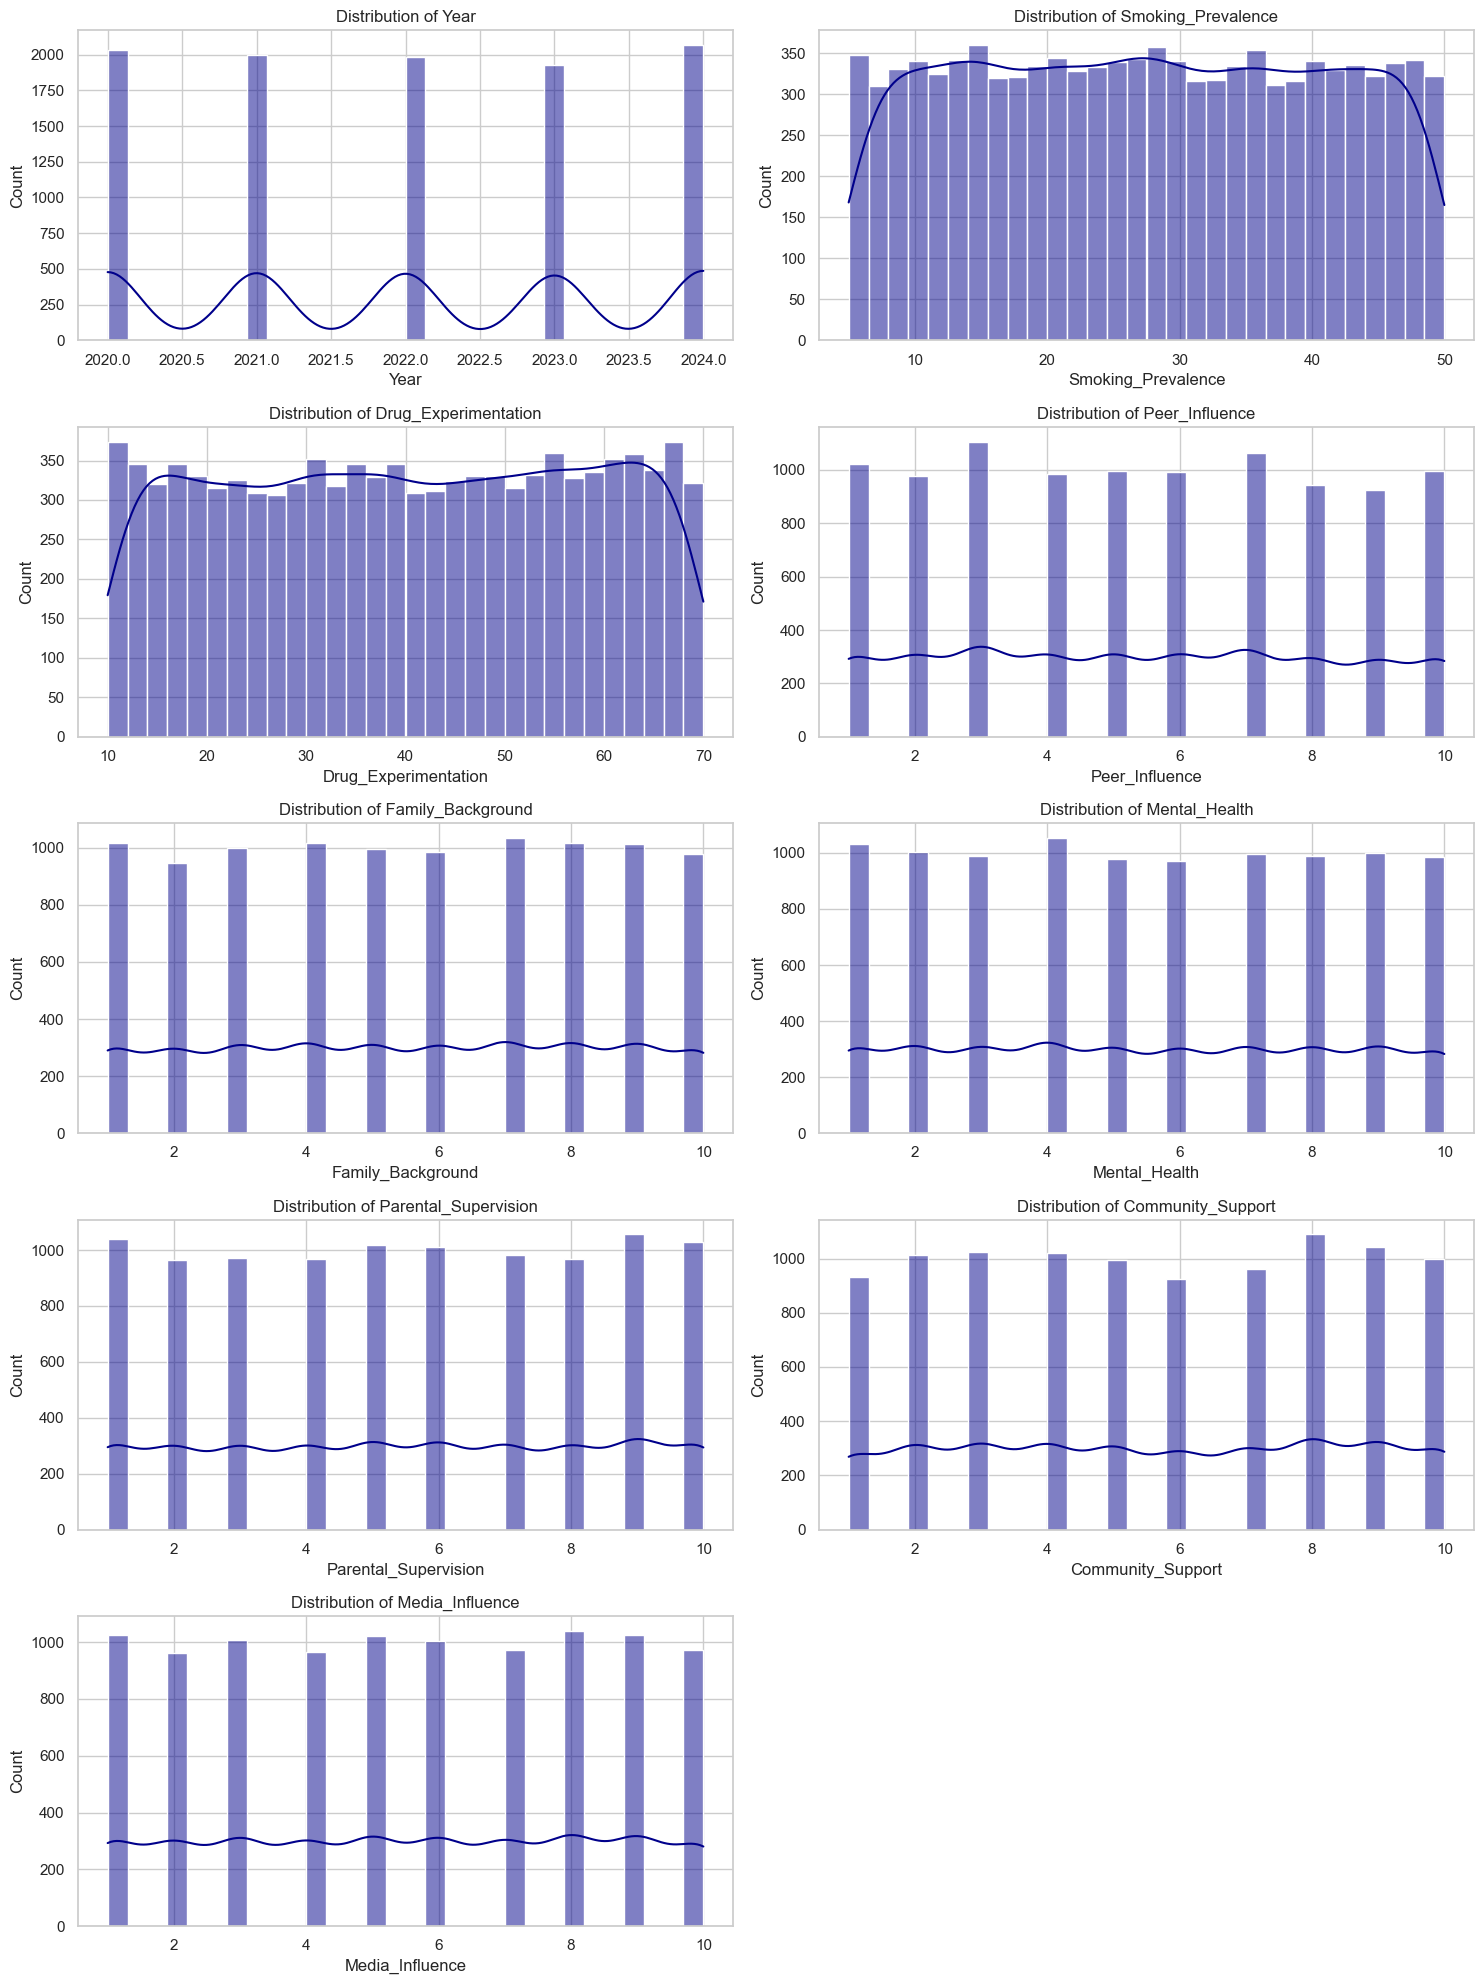

In [25]:
# Set up the visual style
sns.set(style="whitegrid")

# Plotting the distributions of numeric columns to understand their spread
numeric_columns = df.select_dtypes(include=[float, int]).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='Darkblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()
